In [2]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
from ephys import rasters
import pickle
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import seaborn as sns
from importlib import reload
sns.set_context('poster')
sns.set_style('white')
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.py'>

In [6]:
nsamples2 = 25
d = 1
def loss_new(a, beta):
    # take a set of probabilities, generate random configurations, measure KL divergence to data, report loss
    probs = (a*np.ones((ncells, 1)))
    KLsave=[]
    samples = np.random.rand(ncells, nwin, nsamples2)
    probmat = np.tile(probs,  (1, nwin))[:, :, np.newaxis]
    probmat = np.tile(probmat, (1, 1, nsamples2))
    binMatsamples = np.greater(probmat, samples).astype(int)
    SCGs = []
    for ind in range(nsamples2):
        msimps = sc.binarytomaxsimplex(binMat=binMatsamples[:, :, ind], rDup=True)
        Emodel = sc.simplicialChainGroups(msimps)

        Ddata = sc.boundaryOperatorMatrix(Edata)
        Dsamp = sc.boundaryOperatorMatrix(Emodel)
        Lsamp = sc.laplacian(Dsamp, d)
        Ldata = sc.laplacian(Ddata, d)
        if (np.size(Lsamp) > np.size(Ldata)):
            (Ldata, Lsamp) = sc.reconcile_laplacians(Ldata, Lsamp)
        else:
            (Lsamp, Ldata) = sc.reconcile_laplacians(Lsamp, Ldata)
        rsamp = sc.densityMatrix(Lsamp, beta)
        
        rdata = sc.densityMatrix(Ldata, beta)
        
        KLsave.append(sc.KLdivergence(rdata, rsamp))
    m = np.mean(KLsave)
    std = np.std(KLsave)
    stderr = std / np.sqrt(nsamples2)
    return (m, stderr)


In [11]:
# Generate binary matrix with given probabilities for each "cell"
ncells = 20
nwin = 1000
a = 0.02
probs = (a*np.ones((ncells, 1)))
nsamples = 1
samples = np.random.rand(ncells, nwin, nsamples)
probmat = np.tile(probs,  (1, nwin))[:, :, np.newaxis]
probmat = np.tile(probmat, (1, 1, nsamples))
binMatsamples = np.greater(probmat, samples).astype(int)

In [19]:
# Compute SCG for each sample
SCGs = []
for ind in range(nsamples):
    msimps = sc.binarytomaxsimplex(binMat=binMatsamples[:, :, ind], rDup=True)
    E = sc.simplicialChainGroups(msimps)
    SCGs.append(E)
Edata = SCGs[0]


est_save = []
ntrials = 1
X = np.linspace(0.005, 0.06, 100)

for t in range(ntrials):
    print(t)
    KL=[]
    KLerr = []
    for x in X:
        print(x)
        (m, stderr) = loss_new(x, 0.15)
        KL.append(m)
        KLerr.append(stderr)
        
    
    index_min = np.argmin(KL)
    est_save.append(X[index_min])

0
0.005
0.00555555555556
0.00611111111111
0.00666666666667
0.00722222222222
0.00777777777778
0.00833333333333
0.00888888888889
0.00944444444444
0.01
0.0105555555556
0.0111111111111
0.0116666666667
0.0122222222222
0.0127777777778
0.0133333333333
0.0138888888889
0.0144444444444
0.015
0.0155555555556
0.0161111111111
0.0166666666667
0.0172222222222
0.0177777777778
0.0183333333333
0.0188888888889
0.0194444444444
0.02
0.0205555555556
0.0211111111111
0.0216666666667
0.0222222222222
0.0227777777778
0.0233333333333
0.0238888888889
0.0244444444444
0.025
0.0255555555556
0.0261111111111
0.0266666666667
0.0272222222222
0.0277777777778
0.0283333333333
0.0288888888889
0.0294444444444
0.03
0.0305555555556
0.0311111111111
0.0316666666667
0.0322222222222
0.0327777777778
0.0333333333333
0.0338888888889
0.0344444444444
0.035
0.0355555555556
0.0361111111111
0.0366666666667
0.0372222222222
0.0377777777778
0.0383333333333
0.0388888888889
0.0394444444444
0.04
0.0405555555556
0.0411111111111
0.0416666666667
0.

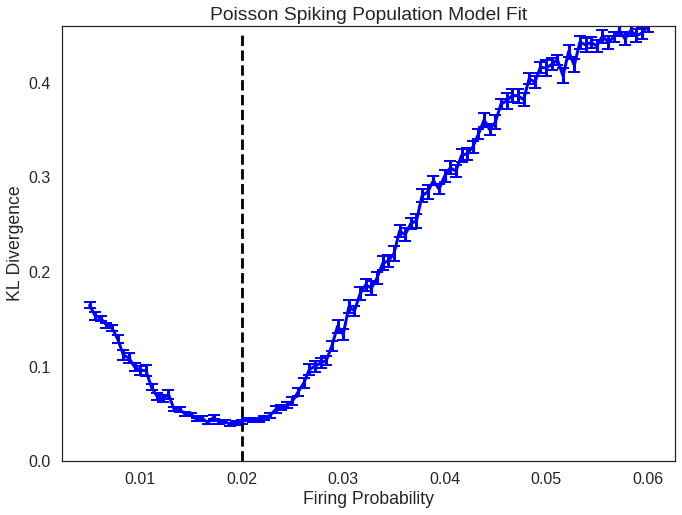

In [20]:
sns.set_style('white')
plt.figure(figsize=(11,8))
plt.errorbar(X, KL, yerr=KLerr, linewidth=3, capsize=6, capthick=2, fmt='b')
plt.ylim(0, 0.46)
plt.plot(a*np.ones((20, 1)), np.linspace(0, 0.45, 20), 'k--')
plt.xlabel('Firing Probability')
plt.ylabel('KL Divergence')
plt.title('Poisson Spiking Population Model Fit')
#plt.savefig('/Users/brad/PoissonFit-{}.pdf'.format(a), format='pdf')

In [18]:
test = binMatsamples[:, :, 0]
np.mean(np.sum(test, axis=1) / 1000)

0.020100000000000003